# **1. Perkenalan Dataset**


Judul Dataset : Shop Customer Data

Link Dataset : https://www.kaggle.com/datasets/datascientistanna/customers-dataset

Data Pelanggan Toko adalah analisis mendetail tentang pelanggan ideal toko imajinatif. Ini membantu bisnis untuk lebih memahami pelanggannya. Pemilik toko mendapatkan informasi tentang Pelanggan melalui kartu anggota.

Dataset terdiri dari 2000 record dan 8 kolom:

Customer ID
- Gender
- Age
- Annual Income
- Spending Score - Skor yang diberikan oleh toko, berdasarkan perilaku pelanggan dan sifat pembelanjaan
- Profession
- Work Experience - dalam tahunan
- Family Size

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv('/content/Customers.csv')
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## A. Memahamai Struktur Data

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [5]:
print(f"Jumlah kolom dataset: {df.columns.size} kolom.")
print(f"Jumlah baris dataset: {df.index.size} baris.")

Jumlah kolom dataset: 8 kolom.
Jumlah baris dataset: 2000 baris.


## B. Menangani Data yang Hilang

In [6]:
print(df.isnull().sum())

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64


In [7]:
df.dropna(inplace=True)

In [8]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64


## C. Analisis Distribusi dan Korelasi

In [10]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000
mean,1000.309924,48.894656,110616.009669,51.078880,4.092621,3.757252
std,578.443714,28.414889,45833.860195,27.977176,3.926459,1.968335
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,498.000000,25.000000,74350.000000,28.000000,1.000000,2.000000
50%,1000.000000,48.000000,109759.000000,50.000000,3.000000,4.000000
75%,1502.000000,73.000000,149095.000000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


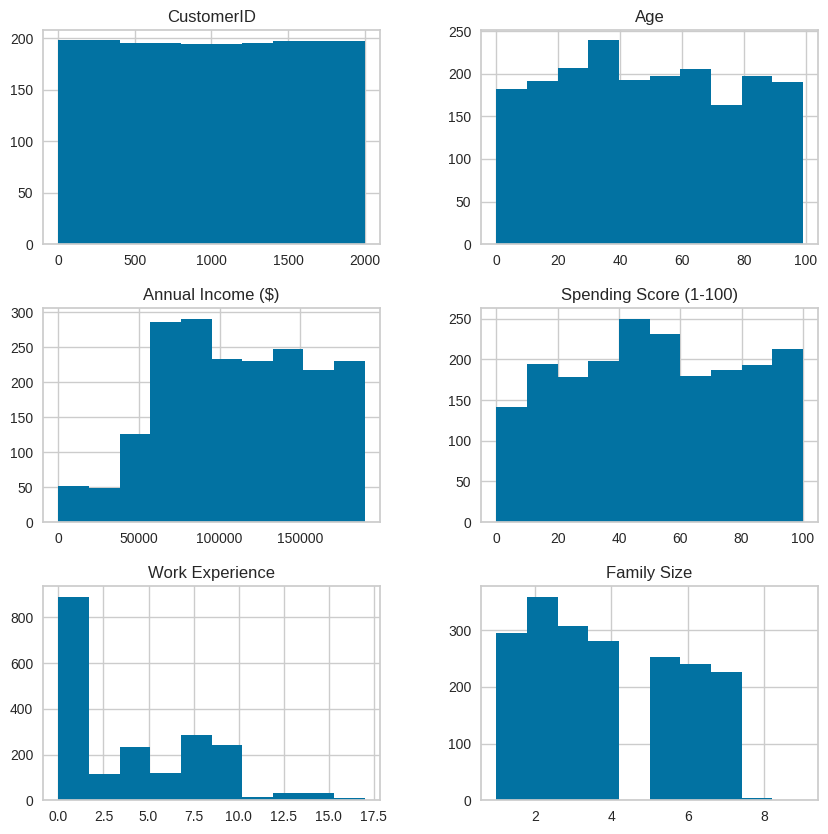

In [11]:
df.hist(figsize=(10, 10))
plt.show()

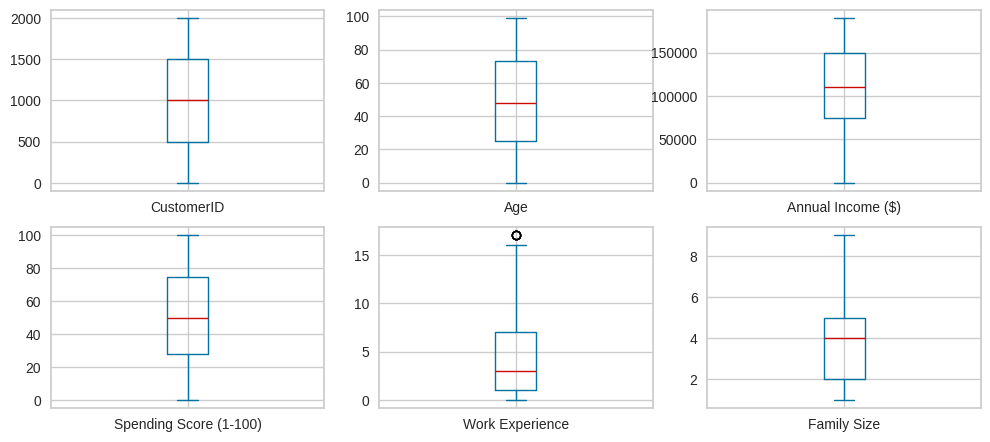

In [12]:
df.plot(kind='box', subplots=True, layout=(3, 3), figsize=(12, 8))
plt.show()

In [14]:
correlation_matrix = df.corr(numeric_only=True)

## D. Visualisasi Data

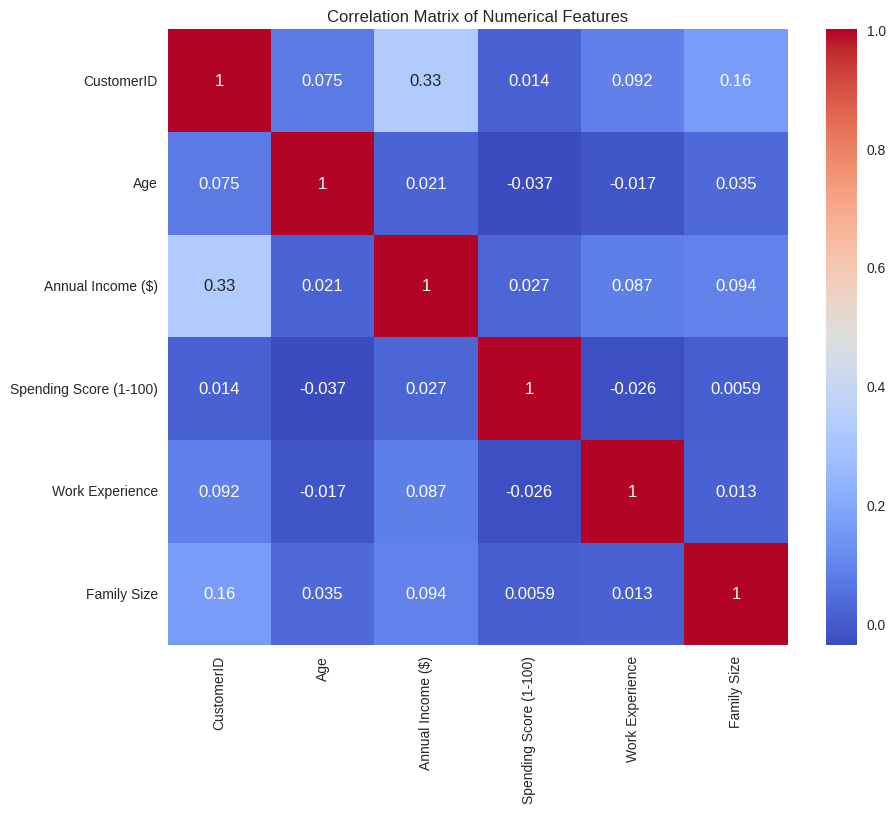

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

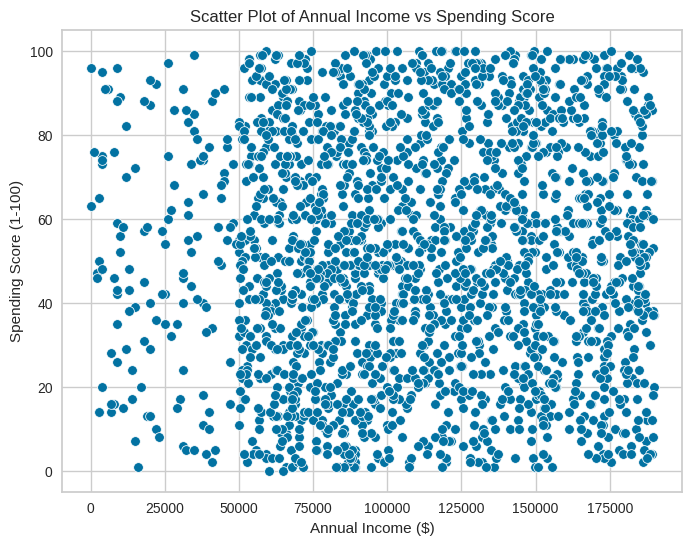

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income ($)', y='Spending Score (1-100)', data=df)
plt.title('Scatter Plot of Annual Income vs Spending Score')
plt.show()

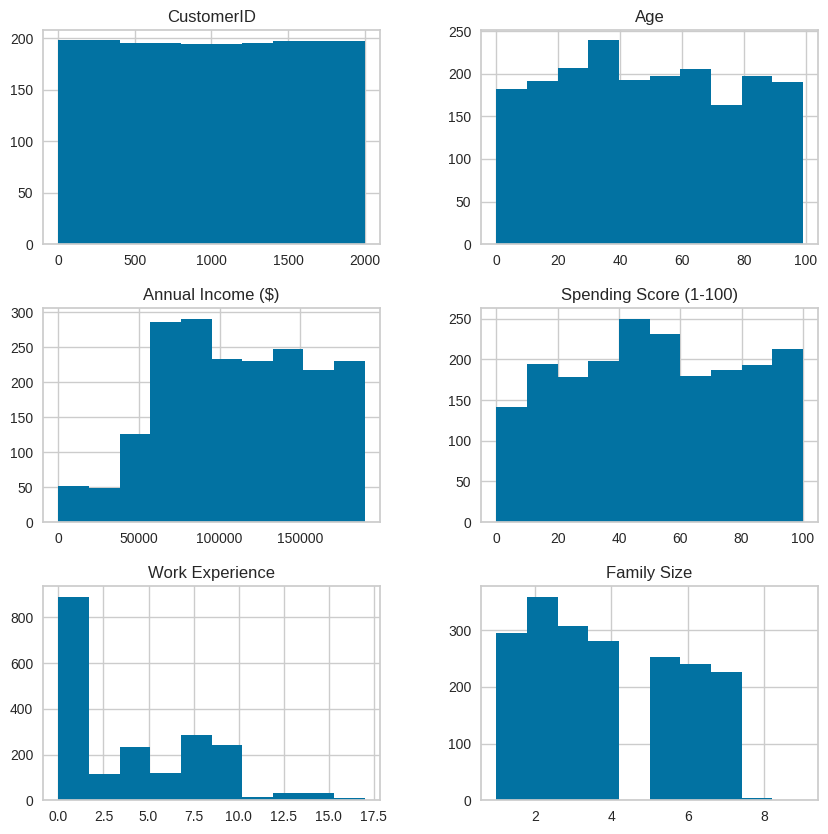

In [29]:
df.hist(figsize=(10, 10))
plt.show()

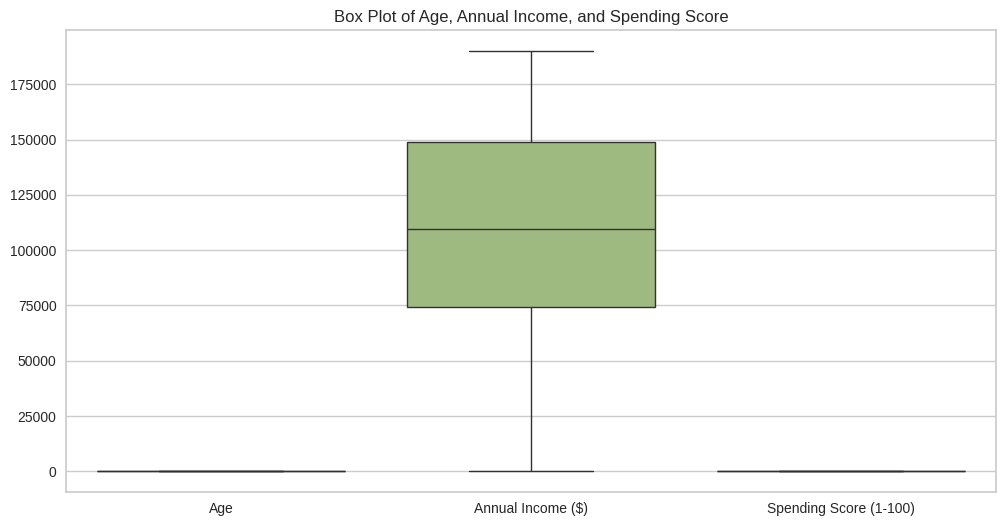

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Annual Income ($)', 'Spending Score (1-100)']])
plt.title('Box Plot of Age, Annual Income, and Spending Score')
plt.show()

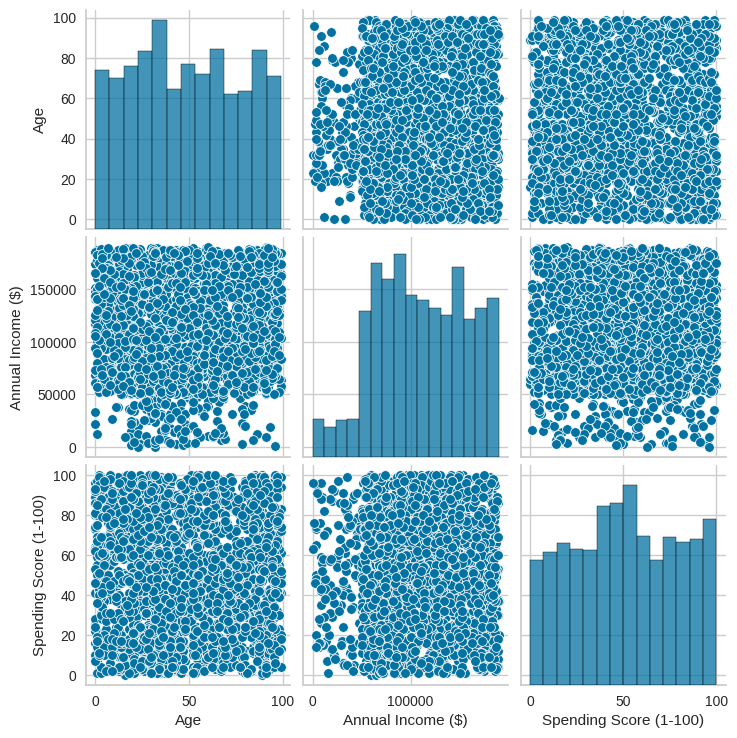

In [33]:
sns.pairplot(df[['Age', 'Annual Income ($)', 'Spending Score (1-100)']])
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [34]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Profession'] = label_encoder.fit_transform(df['Profession'])

In [35]:
features_to_scale = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,1,-1.052345,-2.086675,-0.431850,5,-0.787837,0.123358
1,2,1,-0.981941,-1.650205,1.069755,2,-0.278342,-0.384815
2,3,0,-1.017143,-0.537207,-1.611684,2,-0.787837,-1.401161
3,4,0,-0.911538,-1.126441,0.926745,7,-1.042584,-0.892988
4,5,0,-0.629924,-1.584734,-0.396098,3,-0.533089,1.139704


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [54]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [55]:
kmeans.fit(df)

KMeans(n_clusters=3, random_state=42)

In [56]:
df['Cluster'] = kmeans.labels_

In [57]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Cluster
0,1,1,-1.052345,-2.086675,-0.431850,5,-0.787837,0.123358,2
1,2,1,-0.981941,-1.650205,1.069755,2,-0.278342,-0.384815,2
2,3,0,-1.017143,-0.537207,-1.611684,2,-0.787837,-1.401161,2
3,4,0,-0.911538,-1.126441,0.926745,7,-1.042584,-0.892988,2
4,5,0,-0.629924,-1.584734,-0.396098,3,-0.533089,1.139704,2


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [58]:
silhouette_avg = silhouette_score(df, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5903331485997135


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


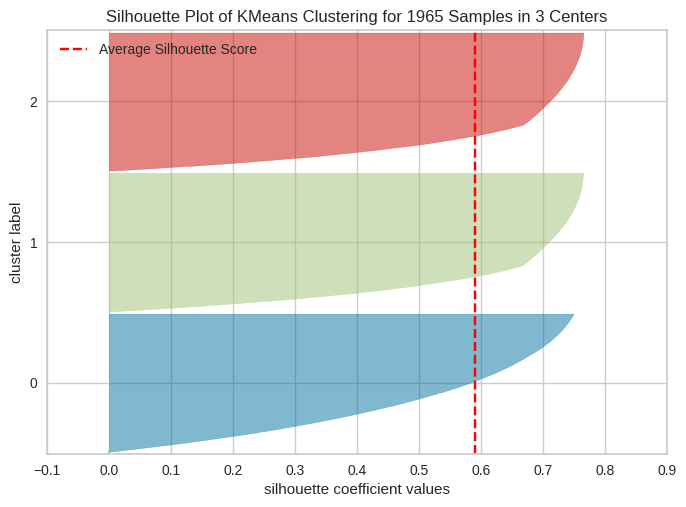

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1965 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [59]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df)
visualizer.show()

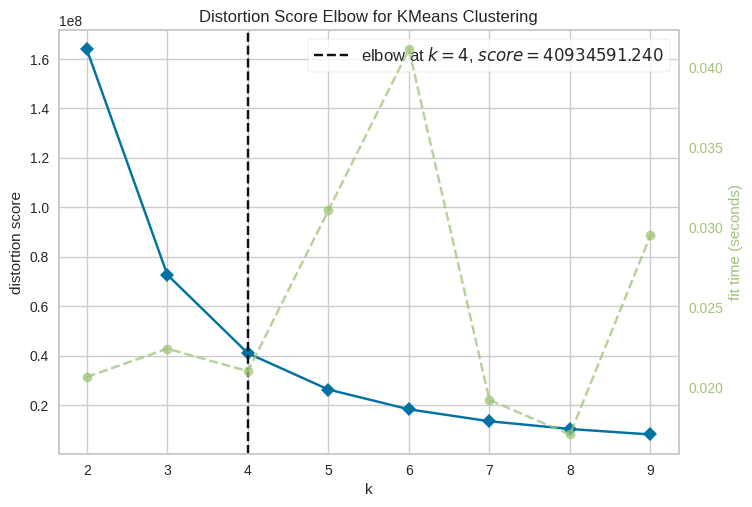

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [60]:
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(df)
visualizer.show()

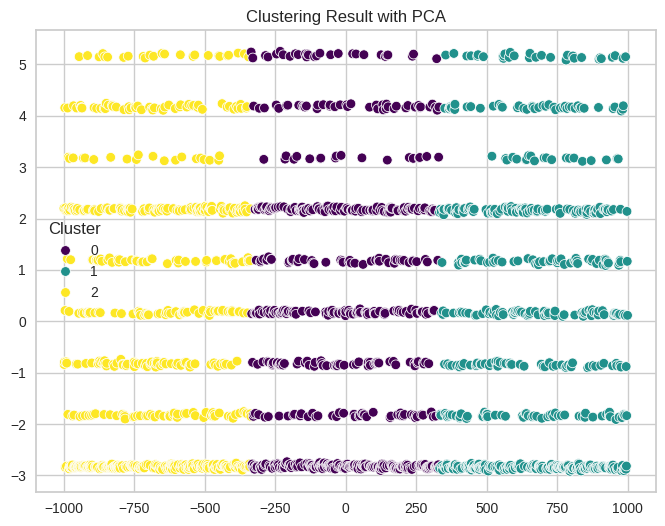

In [61]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Clustering Result with PCA')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [62]:
for cluster_label in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster_label]
    print(f"\nKarakteristik Cluster {cluster_label}:")
    print(cluster_data.describe())  # Statistik deskriptif
    # Analisis lebih lanjut dapat dilakukan pada kolom spesifik, misal:
    print(f"Rata-rata annual income di cluster {cluster_label}: {cluster_data['Annual Income ($)'].mean()}")


Karakteristik Cluster 2:
       CustomerID      Gender         Age  Annual Income ($)  \
count  654.000000  654.000000  654.000000         654.000000   
mean   331.735474    0.400612   -0.096299          -0.431879   
std    191.712901    0.490397    0.916644           1.095837   
min      1.000000    0.000000   -1.721179          -2.414027   
25%    166.250000    0.000000   -0.805933          -1.170088   
50%    331.500000    0.000000   -0.225103          -0.559031   
75%    496.750000    1.000000    0.602138           0.442160   
max    664.000000    1.000000    1.763797           1.731868   

       Spending Score (1-100)  Profession  Work Experience  Family Size  \
count              654.000000  654.000000       654.000000   654.000000   
mean                 0.014345    2.796636         0.014189    -0.238735   
std                  1.020266    2.579206         1.120734     0.935284   
min                 -1.826199    0.000000        -1.042584    -1.401161   
25%                 -0

1. Cluster 0:

Karakteristik Utama:
- Annual Income: Rata-rata lebih tinggi dibandingkan Cluster 2, dengan nilai positif (0.203), menunjukkan kelompok ini memiliki pendapatan tahunan yang relatif lebih baik.
- Age: Distribusi usia cukup tersebar, dengan nilai rata-rata mendekati nol (0.05), menunjukkan kelompok ini memiliki usia yang seimbang tanpa dominasi usia muda atau tua.
- Spending Score: Rata-rata sedikit negatif (-0.045), menunjukkan kelompok ini cenderung tidak terlalu boros.
- Family Size: Ukuran keluarga mendekati rata-rata (0.12), menunjukkan keluarga dengan ukuran yang tidak terlalu besar.
- Profession: Sebagian besar pekerjaan berada pada rentang menengah dengan rata-rata 2.87.

Interpretasi: Kelompok ini bisa mencerminkan pelanggan kelas menengah dengan penghasilan moderat dan pengeluaran yang cenderung terkendali. Mereka mungkin menjadi target untuk produk dengan nilai ekonomi tinggi.
2. Cluster 1:

Karakteristik Utama:
- Annual Income: Sedikit lebih tinggi dibandingkan Cluster 0 (0.228), menunjukkan kelompok ini memiliki daya beli yang sedikit lebih baik.
- Age: Distribusi usia juga seimbang seperti Cluster 0, dengan nilai rata-rata (0.04).
- Spending Score: Rata-rata lebih baik dibandingkan Cluster 0 (0.031), menunjukkan kelompok ini lebih cenderung melakukan pembelian.
- Family Size: Hampir serupa dengan Cluster 0 (0.11), menunjukkan ukuran keluarga standar.
- Profession: Pekerjaan serupa dengan Cluster 0 (2.82), sebagian besar di tingkat menengah.

Interpretasi: Cluster ini merepresentasikan pelanggan dengan daya beli sedikit lebih tinggi dan pengeluaran yang lebih aktif dibandingkan Cluster 0. Mereka potensial untuk program loyalitas atau produk premium.
3. Cluster 2:

Karakteristik Utama:
- Annual Income: Rata-rata negatif (-0.432), menunjukkan kelompok ini memiliki penghasilan di bawah rata-rata.
- Age: Sedikit lebih muda dibandingkan cluster lainnya dengan rata-rata usia negatif (-0.096).
- Spending Score: Nilai pengeluaran juga sedikit negatif (0.014), mencerminkan pola pengeluaran lebih terkendali atau konservatif.
- Family Size: Ukuran keluarga cenderung lebih kecil (-0.24), menunjukkan mereka mungkin terdiri dari individu atau keluarga kecil.
- Profession: Sebagian besar di tingkat pekerjaan awal dengan rata-rata profesi 2.79.

Interpretasi: Cluster ini cenderung mencakup pelanggan dengan pendapatan rendah dan ukuran keluarga kecil. Kelompok ini mungkin lebih tertarik pada promosi diskon atau produk dengan harga terjangkau.



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [63]:
df.to_csv('hasil_clustering.csv', index=False)